# Advantage of relaxed SP definition

In this experiment, for a synthetic data set with a subset of designed SP and a number of spurrious (and very weak) SP occurences, we will show that our framework for a relaxed definition allows us to differentiate between the two groups of occurences

In [1]:
import pandas as pd
import detect_simpsons_paradox as dsp
import numpy as np
import string
import random

For our evaluations, we will need a few different types of trend objects. The package provides dictionaries of default trend lists for ease of use of default settings

In [2]:
dsp.default_binary_trends

{'binary_rank': detect_simpsons_paradox.trends.binary_mean_rank_trend,
 'binary_sign': detect_simpsons_paradox.trends.binary_pearson_trend}

In [3]:
dsp.default_distance_trends

{'lin_reg': detect_simpsons_paradox.trends.linear_trend,
 'rank_trend': detect_simpsons_paradox.trends.mean_rank_trend}

In [4]:
# make a list of initialized objects from each
binary_trend_objs = [trend() for trend in dsp.default_binary_trends.values()]
distance_trend_objs = [trend() for trend in dsp.default_distance_trends.values()]
# print one to see that it's a list of initialized objects
binary_trend_objs

## Regression SP

First, we load a dataset as a labeledDataFrame object that has a number of continuous type regressions.  We will load it twice, one for the detection only case and one for the case with a continuous-valued distance. 

In [6]:
# file = '../data/synthetic_continuous16'
file = '../data/synthetic_continuous_bin_compare3'
labeled_df_bin = dsp.labeledDataFrame(file)
labeled_df_dist = dsp.labeledDataFrame(file)

Next we compute the trends using only the binary types and view a sample of 10 random trends

In [7]:
view_sample_bin = labeled_df_bin.get_subgroup_trends_1lev(binary_trend_objs).sample(10)
view_sample_bin

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
2845,x8,x13,H,H2,negative,0.033844,binary_sign,negative,0.126346
91,x1,x4,H,H0,positive,0.111645,binary_sign,positive,0.112414
3248,x10,x13,D,D2,negative,0.005292,binary_sign,positive,0.042834
873,x2,x15,C,C1,positive,0.024015,binary_sign,negative,0.011094
254,x1,x9,H,H3,negative,0.176390,binary_sign,negative,0.143118
663,x2,x8,G,G0,negative,0.108783,binary_sign,negative,0.132409
3297,x10,x15,A,A1,positive,0.051044,binary_sign,negative,0.039702
3500,x11,x16,C,C4,positive,0.064639,binary_sign,negative,0.030600
732,x2,x10,H,H1,negative,0.074348,binary_sign,negative,0.112304
235,x1,x9,C,C3,negative,0.422505,binary_sign,negative,0.143118


Lets look a little at some of the trends that are found

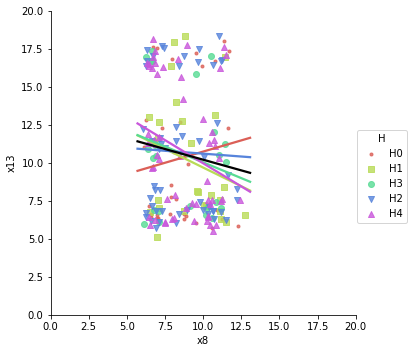

In [8]:
# look at the first of the random selection
view_to_plot = view_sample_bin.loc[view_sample_bin.index[0],['feat1','feat2','group_feat']]

labeled_df_bin.sp_plot(*view_to_plot)

and a view where we know there is strong SP

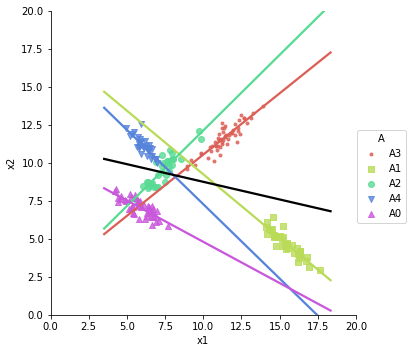

In [9]:

labeled_df_bin.sp_plot('x1','x2','A')

Next we compute the trends using the continuous trends,, and view a sample of 10 random trends

In [10]:
view_sample_dist = labeled_df_dist.get_subgroup_trends_1lev(distance_trend_objs).sample(10)
view_sample_dist

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
605,x2,x6,H,H2,0.121982,0.100112,lin_reg,0.011288,0.008772
805,x2,x13,B,B0,-0.487575,0.299873,lin_reg,-0.250530,0.166207
2571,x7,x13,C,C3,-0.067968,0.057886,lin_reg,-0.148755,0.122341
1556,x4,x11,F,F0,0.047432,0.132942,lin_reg,0.180478,0.206801
804,x2,x13,A,A4,-0.383027,0.071854,lin_reg,-0.250530,0.166207
792,x2,x12,G,G1,0.042455,0.053952,lin_reg,0.052978,0.065649
2146,x6,x9,A,A2,-0.082212,0.066231,lin_reg,0.018383,0.014615
1288,x3,x15,C,C0,-0.732896,0.478221,lin_reg,-0.011408,0.007187
194,x1,x8,A,A2,0.123329,0.059089,lin_reg,0.018752,0.037447
1275,x3,x14,H,H0,0.646395,0.121447,lin_reg,0.169168,0.040311


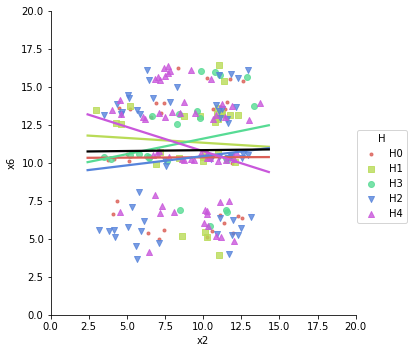

In [11]:
# look at the first of the random selection
view_to_plot = view_sample_dist.loc[view_sample_dist.index[0],['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)

Now, we can filter each table for Simpson's Paradox, using the default setting for each

In [12]:
bin_sp = labeled_df_bin.get_SP_rows('SP')
print(len(bin_sp))
quality_filters = {'name':'SP_qualfilt','distance':.25,'agg_trend_quality':.2,'subgroup_trend_quality':0.2}
bin_sp_qual = labeled_df_bin.get_SP_rows(quality_filters.copy(),replace=True)
print(len(bin_sp_qual))
bin_sp_qual.head()

1454
24


,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP,SP_qualfilt
2,x1,x2,A,A2,positive,0.883091,binary_sign,negative,0.314063,1,True,True
3,x1,x2,A,A3,positive,0.897967,binary_sign,negative,0.314063,1,True,True
9,x1,x2,C,C1,positive,0.828696,binary_sign,negative,0.314063,1,True,True
933,x3,x4,B,B0,negative,0.554819,binary_sign,positive,0.744378,1,True,True
934,x3,x4,B,B1,negative,0.524569,binary_sign,positive,0.744378,1,True,True


We get a lot of reslts, but a lot are for weak trends

In [13]:
quality_filters

{'agg_trend_quality': 0.2,
 'distance': 0.25,
 'name': 'SP_qualfilt',
 'subgroup_trend_quality': 0.2}

In [14]:
dist_sp = labeled_df_dist.get_SP_rows(thresh = .25)
print(len(dist_sp))
dist_sp_qual = labeled_df_dist.get_SP_rows(quality_filters.copy(),replace=True)
print(len(dist_sp_qual))
dist_sp_qual.head()

540
27


,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP_thresh0.25,SP_qualfilt
1,x1,x2,A,A1,-0.836183,0.909223,lin_reg,-0.232091,0.314063,0.298170,True,True
2,x1,x2,A,A2,0.993993,0.883091,lin_reg,-0.232091,0.314063,0.643266,True,True
3,x1,x2,A,A3,0.805987,0.897967,lin_reg,-0.232091,0.314063,0.577054,True,True
4,x1,x2,A,A4,-0.977474,0.798944,lin_reg,-0.232091,0.314063,0.347565,True,True
9,x1,x2,C,C1,0.658446,0.828696,lin_reg,-0.232091,0.314063,0.515880,True,True


Many fewer, and with a threshold on aggregate trend strength, even fewer. We can visually inspect some of the trends that only the binary detector finds and that only the distance based finds

3


/home/smb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  import sys


feat1                              x5
feat2                             x11
group_feat                          F
subgroup                           F0
subgroup_trend               positive
subgroup_trend_quality       0.344175
trend_type                binary_sign
agg_trend                    negative
agg_trend_quality            0.218506
distance                            1
SP                               True
SP_qualfilt                      True
Name: 1908, dtype: object

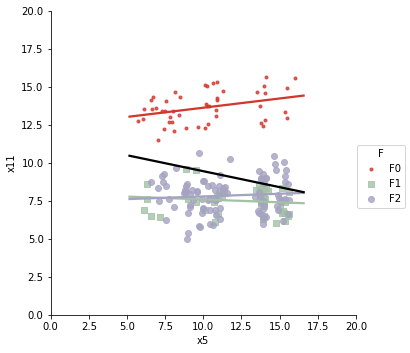

In [16]:
# unique to bin
dist_det = dist_sp_qual.index
bin_det = bin_sp_qual.index
bin_only= [b for b in bin_det if not(b in dist_det)]
print(len(bin_only))
# randomly select one
cursel = np.random.random_integers(len(bin_only)) -1

view_to_plot = labeled_df_bin.result_df.loc[bin_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_bin.result_df.loc[bin_only[cursel],'subgroup']

labeled_df_bin.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_bin.result_df.loc[bin_only[cursel]] #,'subgroup']

6


/home/smb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


feat1                           x1
feat2                           x2
group_feat                       A
subgroup                        A4
subgroup_trend           -0.977474
subgroup_trend_quality    0.798944
trend_type                 lin_reg
agg_trend                -0.232091
agg_trend_quality         0.314063
distance                  0.347565
SP_thresh0.25                 True
SP_qualfilt                   True
Name: 4, dtype: object

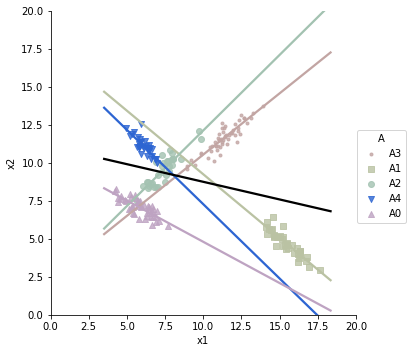

In [18]:
dist_only = [d for d in dist_det if not(d in bin_det)]
print(len(dist_only))
cursel = np.random.random_integers(len(dist_only)) -1
view_to_plot = labeled_df_dist.result_df.loc[dist_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_dist.result_df.loc[dist_only[cursel],'subgroup']

labeled_df_dist.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_dist.result_df.loc[dist_only[cursel]]

The trends that only the distance finds are cases where the subgroup trend is the same sign as aggregate, but significantly different.  So, we find fewer overall and additional interesting trends that binary sign change cannot find. 

In [19]:
# we can check how many in each case were designed in, once we filter in the labeled df ro explose get views for a dtafram
n_view = 8
# in this synthetic dataset we know the structure of the SP designed views
designed_view_list = [('x'+str(i+1),'x'+str(i+2),c) for i,c in 
                      zip(range(0,n_view*2,2),list(string.ascii_uppercase[:n_view]))]
num_designed_views = len(designed_view_list)

# passing the name of the SP we already detected, doesn't compute the detection over, it filters by that column
found_sp_views_bin = labeled_df_bin.get_SP_views('SP_qualfilt',colored=True)
found_sp_views_dist = labeled_df_dist.get_SP_views('SP_qualfilt',colored=True)

In [20]:
# of designed, how many were found
detections_bin = [v for v in designed_view_list if v in found_sp_views_bin]
num_detections_bin = len(detections_bin)
# of found, how many were not designed
undesigned_bin = [v for v in found_sp_views_bin if not(v in designed_view_list)]
num_undesigned_bin = len(undesigned_bin)
print('Success Rate: ',num_detections_bin /num_designed_views)
print('Novel Discoveries of detections: ',num_undesigned_bin /len(found_sp_views_bin))

Success Rate:  0.875
Novel Discoveries of detections:  0.36363636363636365


In [21]:
# of designed, how many were found
detections_dist = [v for v in designed_view_list if v in found_sp_views_dist]
num_detections_dist = len(detections_dist)
# of found, how many were not designed
undesigned_dist = [v for v in found_sp_views_dist if not(v in designed_view_list)]
num_undesigned_dist = len(undesigned_dist)
print('Success Rate: ',num_detections_dist /num_designed_views)
print('Novel Discoveries: ',num_undesigned_dist /len(found_sp_views_dist))

Success Rate:  0.875
Novel Discoveries:  0.3


Some of the designed views may not have any SP, due to the random nature and the quality threshold

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP_thresh0.25,SP_qualfilt
2962,x9,x10,E,E0,-0.387050,0.507822,lin_reg,-0.370255,0.929646,0.009351,False,False
2963,x9,x10,E,E1,-0.568381,0.465880,lin_reg,-0.370255,0.929646,0.103286,False,False


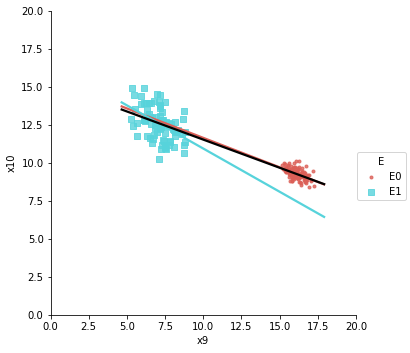

In [22]:
missed_list = [v for v in designed_view_list if not(v in found_sp_views_dist) and not(v in found_sp_views_bin)]

missed_row_df = []
for view_to_plot in missed_list:
    labeled_df_dist.sp_plot(*view_to_plot)
    missed_row_df.append(labeled_df_dist.get_trend_rows(*view_to_plot))
    
feat1_missed,feat2_missed,groupby_missed = zip(*missed_list)
# labeled_df_dist.get_trend_rows(feat1_missed,feat2_missed,groupby_missed)
pd.concat(missed_row_df)

By inspection, we see that the missed ones are all weak in either aggregate or subgroup trend.  Even if there is a reversal, weak trends shouldn't be used to make decsions anyway, so these are not important for further exploration

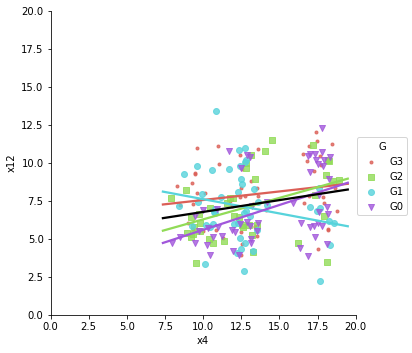

In [23]:
view_to_plot = random.choice(undesigned_bin)
labeled_df_bin.sp_plot(*view_to_plot)

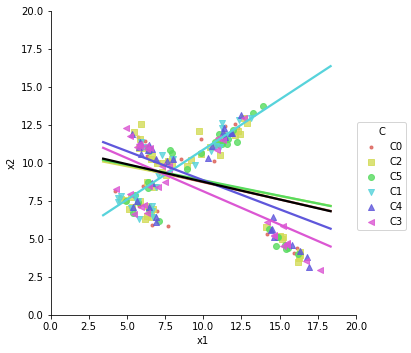

In [24]:
view_to_plot = random.choice(undesigned_bin)
labeled_df_bin.sp_plot(*view_to_plot)

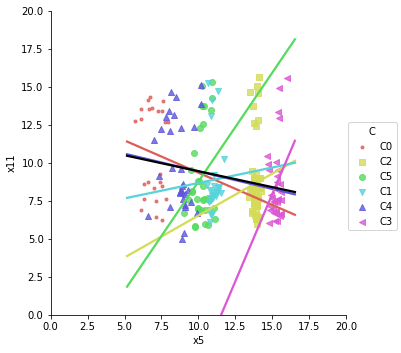

In [25]:
view_to_plot = random.choice(undesigned_dist)
labeled_df_dist.sp_plot(*view_to_plot)

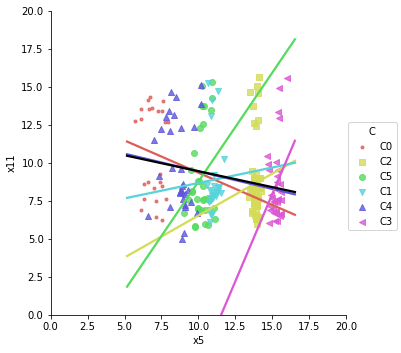

In [31]:
view_to_plot = random.choice(undesigned_dist)
labeled_df_dist.sp_plot(*view_to_plot)

For the continuous-valued, we can futher filter 

## Rank SP

# Two types of SP

In [ ]:
np.prod([True, True, True])

In [ ]:
filter_thresh = {'distance':0,'agg_trend_quality':0,'subgroup_trend_quality':0}
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

labeled_df_bin.result_df[labeled_df_bin.result_df.apply(q_filter,axis=1)]

In [ ]:
filter_thresh = {'distance':.2,'agg_trend_quality':.15,'subgroup_trend_quality':0,'name':'def'}
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

In [ ]:

filter_thresh = quality_filters.copy()
filter_thresh.pop('name')

In [ ]:
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

len(labeled_df_dist.result_df[labeled_df_dist.result_df.apply(q_filter,axis=1)])